# Task 6.5 

### Contents:
#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

## 1. Import Librairies and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'/Users/jacobyount/Documents/Data Analytics/Immersion 6/College Football Portal and Recruiting Analysis/Data'

In [5]:
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'CFB_DF.pkl'))

In [6]:
df.shape

(52181, 19)

In [7]:
df.head()

,season,first_name,last_name,position,school,transfer_to,transfer_date,rating,stars,eligibility,date_of_trasfer,time_of_transfer,ranking,committed_to,recruit_type,city,state_province,country,_merge
0,2021,Cameron,Wilkins,LB,Missouri,UT San Antonio,2021-07-31T14:46:00.000Z,NaN,3.0,Immediate,7/31/21,14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2021,Stephon,Wright,DL,Arizona State,SMU,2021-07-29T15:50:00.000Z,NaN,4.0,Immediate,7/29/21,15:50:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2021,Javar,Strong,S,Arkansas State,NaN,2021-07-28T15:25:00.000Z,NaN,3.0,Immediate,7/28/21,15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,2021,Noah,Mitchell,LB,UT San Antonio,NaN,2021-07-27T15:22:00.000Z,NaN,3.0,Immediate,7/27/21,15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,2021,Trivenskey,Mosley,RB,Southern Mississippi,NaN,2021-07-26T00:00:00.000Z,NaN,3.0,TBD,7/26/21,00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [8]:
# creating df to test with.
columns = ['season', 'rating', 'stars', 'ranking']

In [9]:
df2 = df[columns]

In [10]:
df2.shape

(52181, 4)

In [11]:
df2.head()

,season,rating,stars,ranking
0,2021,NaN,3.0,NaN
1,2021,NaN,4.0,NaN
2,2021,NaN,3.0,NaN
3,2021,NaN,3.0,NaN
4,2021,NaN,3.0,NaN


In [12]:
df2['stars'].fillna(df2['stars'].median(), inplace=True)
df2['rating'].fillna(df2['rating'].median(), inplace = True)

/var/folders/76/mj0jm8j14qqbqx0rbfznx25w0000gn/T/ipykernel_43299/100854132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['stars'].fillna(df2['stars'].median(), inplace=True)
/var/folders/76/mj0jm8j14qqbqx0rbfznx25w0000gn/T/ipykernel_43299/100854132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rating'].fillna(df2['rating'].median(), inplace = True)


In [13]:
df_2= df2[columns][df2['ranking'].isnull() == False]

In [14]:
df_2.isnull()

,season,rating,stars,ranking
5778,False,False,False,False
5779,False,False,False,False
5780,False,False,False,False
5781,False,False,False,False
5782,False,False,False,False
...,...,...,...,...
52176,False,False,False,False
52177,False,False,False,False
52178,False,False,False,False
52179,False,False,False,False


### 2. Elbow Technique

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-59312844591.71653,
 -15388038366.060358,
 -6643784819.67915,
 -3741018712.611388,
 -2399809736.5165415,
 -1676196091.9281335,
 -1258586495.3874936,
 -973321670.0858996,
 -780328828.0169374]

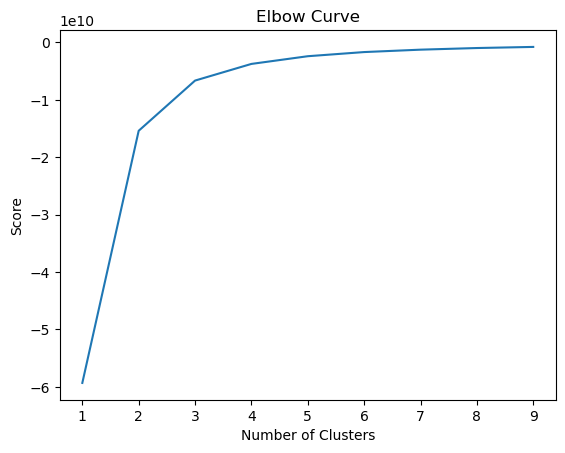

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### In this instance the curve slows at 3. 

### 3. K-means Clustering

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [19]:
# Fit the k-means object to the data.

kmeans.fit(df_2)

KMeans(n_clusters=3)

In [20]:
df_2['clusters'] = kmeans.fit_predict(df_2)

In [21]:
df_2.head()

,season,rating,stars,ranking,clusters
5778,2012,0.9997,5.0,1.0,2
5779,2012,0.9995,5.0,2.0,2
5780,2012,0.9979,5.0,3.0,2
5781,2012,0.9975,5.0,4.0,2
5782,2012,0.9974,5.0,5.0,2


In [22]:
df_2['clusters'].value_counts()

2    18105
0    15793
1    12145
Name: clusters, dtype: int64

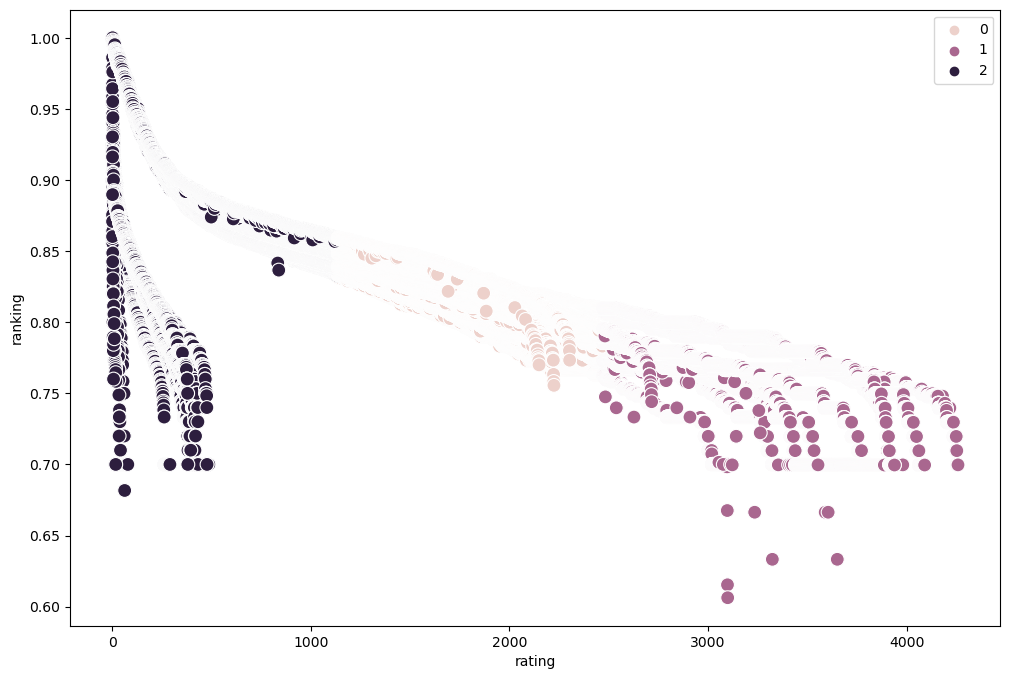

In [24]:
# Plot the clusters for the "rating" and "ranking" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['ranking'], y=df_2['rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('rating') # Label x-axis.
plt.ylabel('ranking') # Label y-axis.
plt.show()

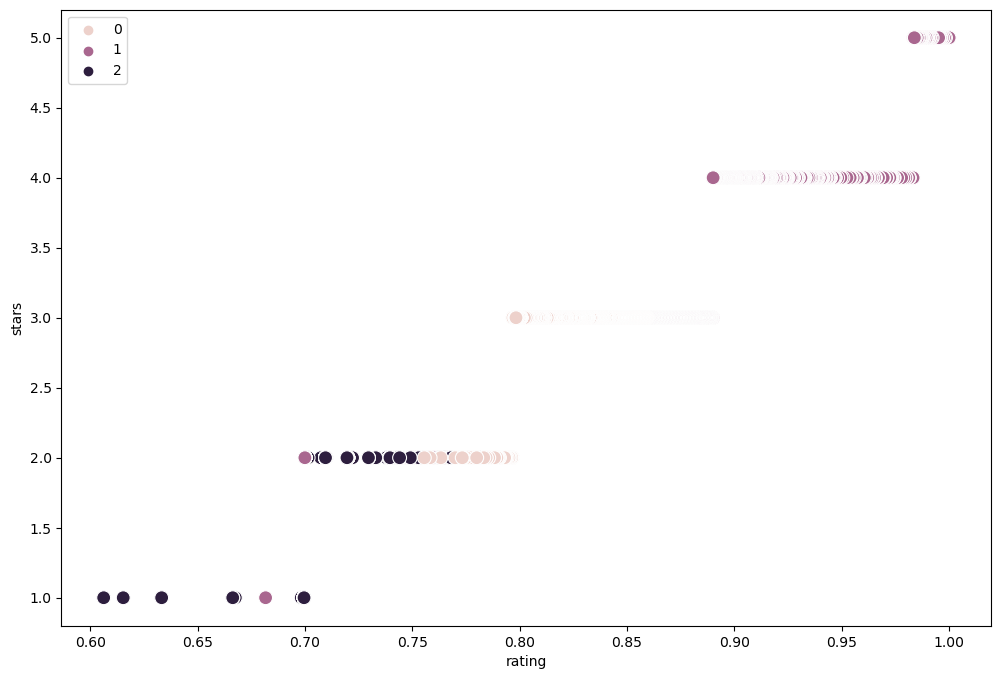

In [118]:
# Plot the clusters for the "rating" and "stars" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['rating'], y=df_2['stars'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('rating') # Label x-axis.
plt.ylabel('stars') # Label y-axis.
plt.show()

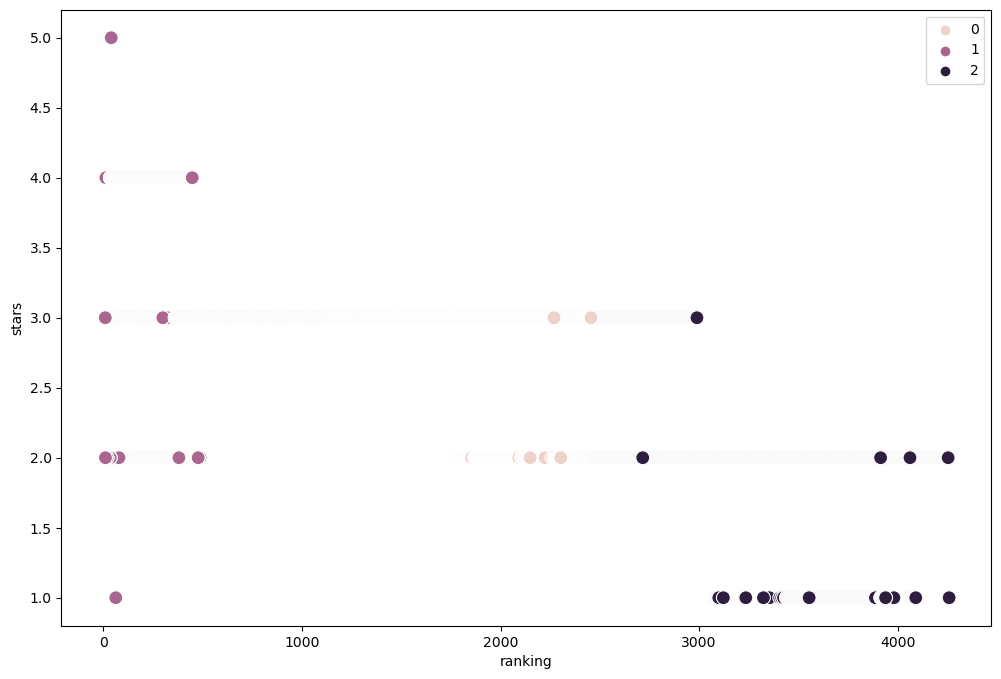

In [119]:
# Plot the clusters for the "stars" and "ranking" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['ranking'], y=df_2['stars'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ranking') # Label x-axis.
plt.ylabel('stars') # Label y-axis.
plt.show()

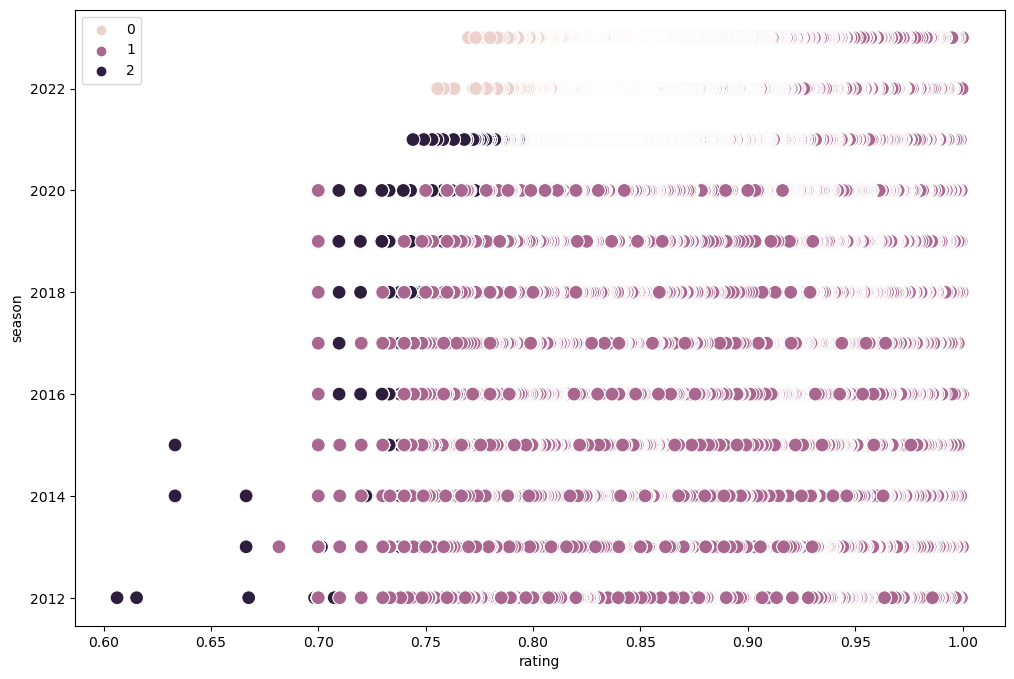

In [120]:
# Plot the clusters for the "season" and "rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['rating'], y=df_2['season'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('rating') # Label x-axis.
plt.ylabel('season') # Label y-axis.
plt.show()

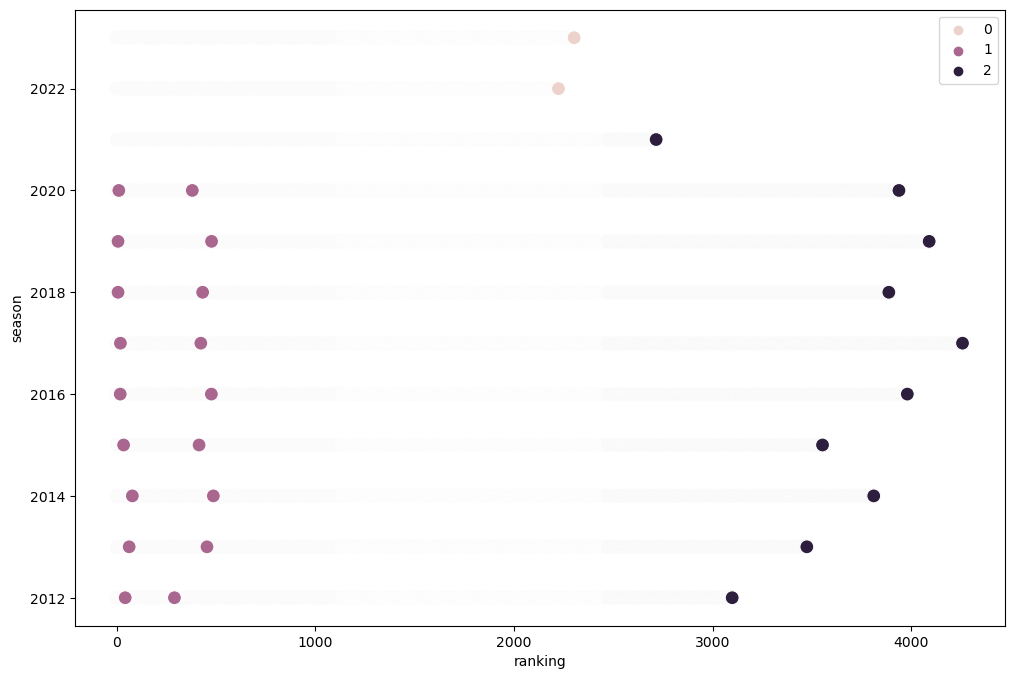

In [121]:
# Plot the clusters for the "season" and "rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['ranking'], y=df_2['season'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ranking') # Label x-axis.
plt.ylabel('season') # Label y-axis.
plt.show()

### The first cluster chart is the most descriptive. It shows that there is a clear grouping of athletes that are rated .6-.75 are ranked lower. Second group is .75-.85 and they tend to fall in the 2000-1000 rating. The final grouping could use some more exploring. Though these atheltes are ranked higher 1-1000, their rating spans very wide. This could be a result of limited players at a certain position. Or certain positions aren't as highly rated. Could show bias as well. We could group these by position to get a better breakdown. Might help define clusters. <br>

In [125]:
df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'dark purple'
df_2.loc[df_2['clusters'] == 1, 'cluster'] = 'purple'
df_2.loc[df_2['clusters'] == 0, 'cluster'] = 'pink'

In [128]:
df_2.groupby('cluster').agg({'season':['mean', 'median'], 
                         'rating':['mean', 'median'], 
                         'stars':['mean', 'median'],
                          'ranking':['mean', 'median']})

season            rating             stars         \
                    mean  median      mean  median      mean median   
cluster                                                               
dark purple  2016.598764  2017.0  0.762501  0.7667  1.998517    2.0   
pink         2017.374043  2017.0  0.815840  0.8173  2.796304    3.0   
purple       2017.185971  2017.0  0.867342  0.8647  3.190831    3.0   

                 ranking          
                    mean  median  
cluster                           
dark purple  3162.952040  3121.0  
pink         1789.508701  1787.0  
purple        484.582657   419.0

#### Season statistics are relevant as it is a date. It shows that there is a small difference in rating values as you aproach a higher ranking. As stated before this is looking at all player positions. We could get more accurate data looking at this by specific position or offense, defense, or special teams. 

In [41]:
df_2.to_csv(os.path.join(path,'Prepared Data', 'cluster.csv'))